# **Lab experience #2 (students): Proximity measures**

This second lab session aims to start dealing with tools and Python code to compute different proximity measures (using SciPy).

To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously or click on the "play" icon.

To know more about Python coding for this lab, you can read the [**SciPy documentation**](https://docs.scipy.org/doc/scipy/index.html) where you can find the explanations of the packages used during the lab (e.g., [scipy.spatial.distance](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance)).

I remind you that to rapidly access the documentation you can also create a new code cell and type in "function_name?" (e.g., matplotlib?) and run the cell.


Read the step-by-step instructions below carefully and write your own code to fill the missing steps. Guiding slides are available on Moodle to better explain the steps to perform.


_Note: Google Colab has been recently upgraded to Python 3.8 (see related Medium article [here](https://medium.com/google-colab/colab-updated-to-python-3-8-4922f9970a72#:~:text=We're%20happy%20to%20announce,runtime%20to%20Python%20version%203.8.))._

### Visualize and describe the dataset

*The description of the dataset will be given together with the dataset at the beginning of the lab session (will be uploaeded on Moodle).*

**Task 1:** Print the data on screen and visualize it in three different ways (image, line plot, scatterplot).

---



In [6]:
import numpy as np
import matplotlib.pyplot as plt

## INSERT HERE THE CODE TO GENERATE THE DATASET (will be given on Moodle at the beginning of the lab session)
#
#
#
#
##

# fix the seed, so as to have the same values in the matrix at every run
seed = 1            # seed for random number generation 
np.random.seed(seed)

# Set the number of objects
N = 20

# Set the dimensionality of the dataset
M = 3

# Generate the 2D matrix with random values (normally distributed)
X = np.random.randn(N,M).round(2)


# Simulate 2 classes
K = 2
X = X+np.abs(np.min(X))
i = int(np.floor(N/2))
X[0:i+1,:]   = ( X[0:i+1,:]  *(-10) - 5 ).round(2)
X[i+1:N+1,:] = ( X[i+1:N+1,:]*10    + 7 ).round(2)

# ----------------------------------------
# TASK1a: Print the matrix shape and values
# ----------------------------------------
# The matrix has shape =
# It has ... objects and ... attributes.
# Print all values


In [10]:
X.shape

(20, 3)

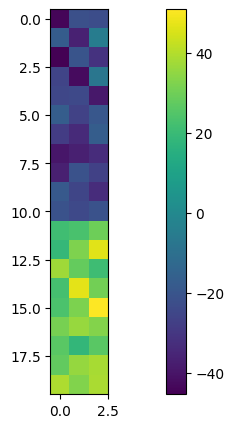

In [15]:
# Visualize all values in a figure as an 2D image (hint: use plt.imshow)
plt.figure(figsize=(15, 5))
# create the image
vmin = X.min()
vmax = X.max()
plt.imshow(X, cmap='viridis', vmin=vmin, vmax=vmax)
# set color limits
# labels
#
# axes ticks
#
# make title
# set a colorbar

plt.colorbar()
plt.show()

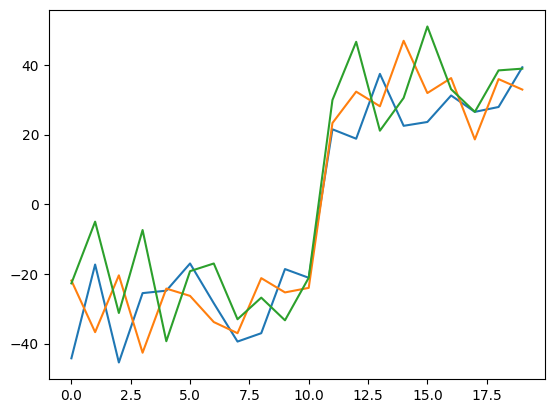

In [16]:
# Visualize values of three different attributes as overlapping time series (hint: use plt.plot for each of them)


plt.figure()
# plot of the first attribute
# plot of the second attribute
# plot of the third attribute
# write the labels
#

plt.plot(X[:,0], label='Attribute 1')
plt.plot(X[:,1], label='Attribute 2')
plt.plot(X[:,2], label='Attribute 3')

# set the axes limits
# write the title
# set a legend
# plt.grid()
# plt.show()

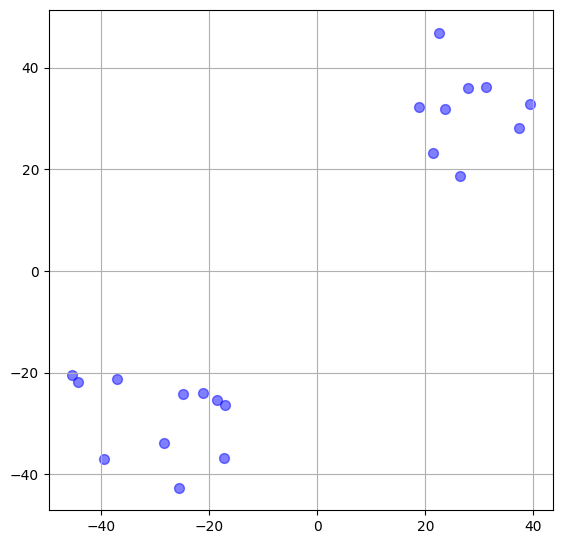

In [17]:
# Create a scatterplot of the first two attributes (hint: use plt.scatter)
f, ax = plt.subplots(figsize=(6.5, 6.5))
# make the scatterplot
plt.grid()

plt.scatter(X[:,0], X[:,1], c='b', s=50, alpha=0.5)
# labels
#
# plt.show()

### Use Pandas DataFrame and compute centroids

In this cell, you will trasnform the data from a NumPy matrix into a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), adding a new column with labels to indicate the classes which every object belongs to.

**Task 2:** Create a DataFrame containing the dataset, print it on the screen and visualize it using a scatterplot where labels are coded with different colors.

Use blue dots for the objects of Class 0, red dots for the objcts of Class 1, a blue square for the centroid of Class 0, and a red square for the centroid of Class 1.


In [33]:
# Add info of class to the scatterplot: for this, transform X from list to Pandas DataFrame
import pandas as pd

# creating a list of column names
columnNames = ['Attribute 1', 'Attribute 2', 'Attribute 3']

# ----------------------------------------------------
# TASK2: Create the DataFrame (use the pandas package)
# ----------------------------------------------------
df = pd.DataFrame(X, columns=columnNames)

# Assign labels to objects: first i* objects belong to class "0", the remaining to class "1" (0 and 1 should be numerical). *i was given in the first snippet of code.
a1  = np.zeros(i+1)
a2  = np.ones(N-i-1)
col = np.concatenate( [a1, a2] )
df['Class'] = col

# update the list of column names
columnNames = df.columns.values

# displaying the dataframe

df

,Attribute 1,Attribute 2,Attribute 3,Class
0,-44.2,-21.9,-22.7,0.0
1,-17.3,-36.7,-5.0,0.0
2,-45.4,-20.4,-31.2,0.0
3,-25.5,-42.6,-7.4,0.0
4,-24.8,-24.2,-39.3,0.0
5,-17.0,-26.3,-19.2,0.0
6,-28.4,-33.8,-17.0,0.0
7,-39.4,-37.0,-33.0,0.0
8,-37.0,-21.2,-26.8,0.0
9,-18.6,-25.3,-33.3,0.0


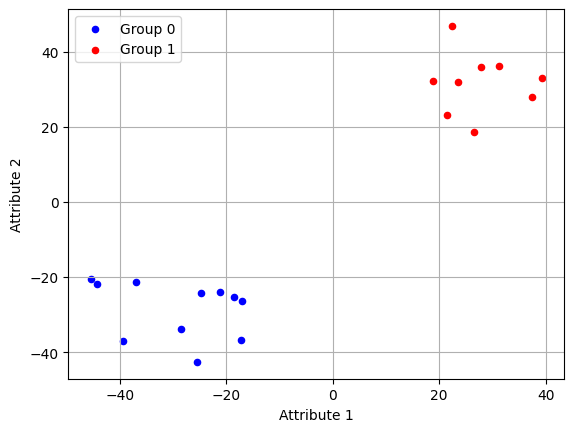

In [34]:
# [NOTHING TO DO FOR YOU HERE] Add color to the previous plot: red for class 1, blue for class 2
ax = df.loc[df['Class'] == 0].plot(kind='scatter', x='Attribute 1', y='Attribute 2',  color='blue', label='Group 0')
df.loc[df['Class'] == 1].plot(kind='scatter', x='Attribute 1', y='Attribute 2',  color='red', label='Group 1', ax=ax);
plt.grid()
plt.show()

**Task 2a [ACTION]:** Compute the "centroid", i.e., the mean point, of each group of objects, and its coordinates.


In [74]:
# Compute the "mean object" (centroid) in each the clusters
centroidk = np.zeros((2,3))

print("We need to compute %d centroids, as we have %d clusters.\n" % (K, K) )
for k in range(0, K):
  cluster_points = df.loc[df['Class'] == k]               #it's a Pandas DataFrame
  # -------------------------------------------
  # TASK2a: Compute the centroid for each group
  # -------------------------------------------
  
  for i, column in enumerate(cluster_points.drop(columns='Class').columns):
    centroidk[k][i] = cluster_points[column].mean()
  
  print("The centroid of cluster %d has coordinates: " % k, *centroidk[k][:], "\n")

We need to compute 2 centroids, as we have 2 clusters.

The centroid of cluster 0 has coordinates:  -28.972727272727276 -28.49090909090909 -23.272727272727277 

The centroid of cluster 1 has coordinates:  27.633333333333333 31.788888888888884 35.099999999999994 



**Task 2b [ACTION]:** Use the code below to obtain an alternative scatterplot (using [seaborn](seaborn.pydata.org)), add the two centroids to the plot (with square marker, and larger size then cluster points).

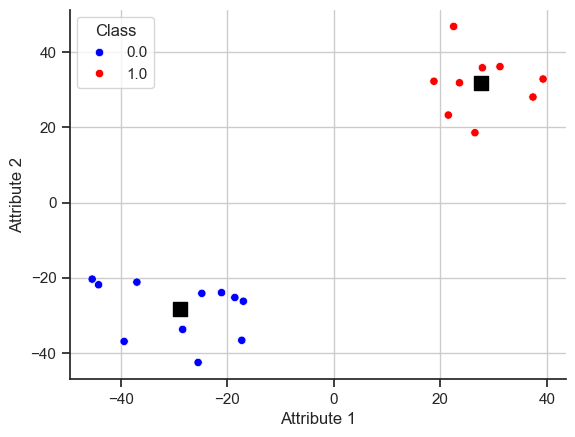

In [75]:
# Using seaborn as an alternative for matplotlib is very common:
import seaborn as sns

# Apply the default theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
PAL = ['blue', 'red']

fig = plt.figure( num = 'Seaborn figure' )
sns.scatterplot(x="Attribute 1", y="Attribute 2", data=df, hue="Class", palette = PAL)
plt.grid()


# ------------------------------------------------------------
# TASK2b: Plot the centroids for all groups in the same figure
# ------------------------------------------------------------
#
#
#
#

plt.scatter(centroidk[:,0], centroidk[:,1], c='black', s=100, marker='s', label='Centroids')

### Compute the proximity matrix using different proximity measures

In this cell, you will compute different proximity measures between pairs of objects, using [scipy.spatial.distance](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html) package.

**Task 3:** Choose a proximity metric and compute the proximity matrix. Repeat the same for three different choices of the metric.

Hint: For the proximity metric, you can choose one of the following:
```
'euclidean', 'minkowski', 'mahalanobis',  'hamming'/'matching', 'jaccard', 'cosine', 'correlation'
```
For computing the distances between two objects you can use:
```
pdist()
```
To read the documentation on-the-fly, you may simply execute:
```
from scipy.spatial.distance import pdist
pdist?
```

_Note: Alternatively, you can use sklearn.metrics.pairwise_distances package._ _However, for this lab, we use the scipy package, as it has all metrics we would like to explore (have a look [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html) to see the differences between the two packages)._

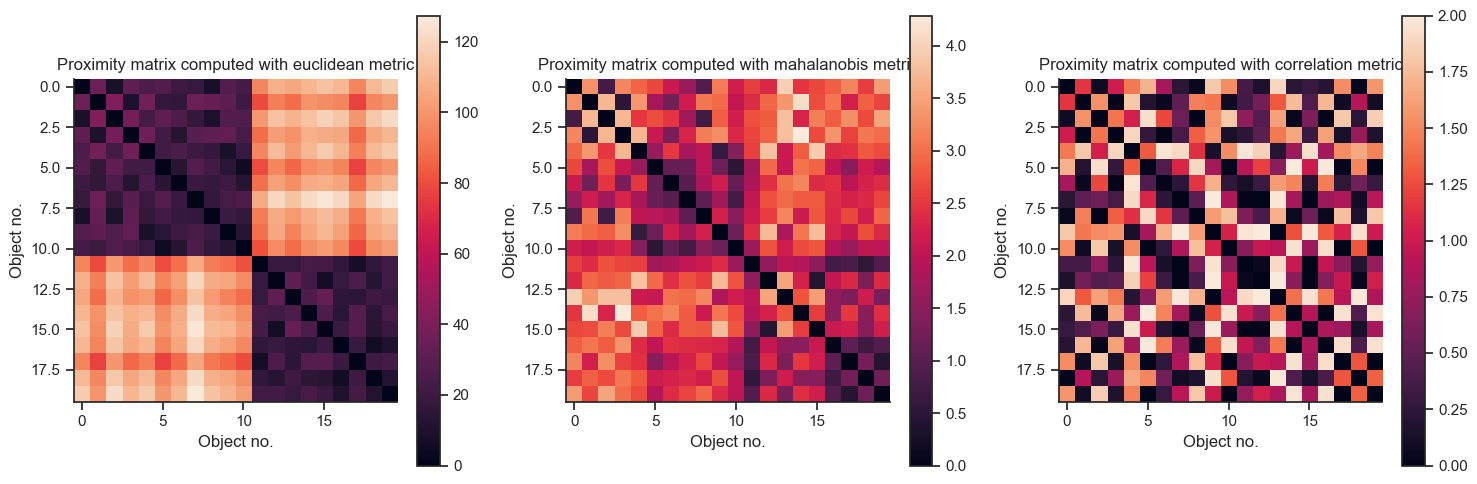

               0       1       2       3       4       5       6       7       8       9      10      11      12      13      14      15      16      17      18      19
       0     0.0   35.44    8.71   31.82   25.64   27.77   20.58    18.9    8.32   27.92   23.25   95.53  108.21  105.25   109.6  113.68  110.29   95.18  110.78  117.35
       1   35.44     0.0   41.73   10.38   37.27    17.6    16.6   35.67   33.22   30.54   20.86   79.52   93.42   88.73   99.16   97.54   95.45   77.26    95.9   99.87
       2    8.71   41.73     0.0   38.15   22.46   31.39   25.89   17.74    9.52   27.33   26.56  100.59  113.81  109.29  113.78  119.39  114.86   100.1   115.7  122.18
       3   31.82   10.38   38.15     0.0   36.83   21.84   13.34   29.66   31.09    31.9   23.52   89.12  102.41   98.83   108.4  106.64  105.15   87.17  105.41  109.74
       4   25.64   37.27   22.46   36.83     0.0   21.66   24.54   20.41   17.72     8.7   18.57   95.86  111.68  101.25  110.29  116.81   109.6   93.77  1

In [99]:
# Compute the PROXIMITY MATRIX
# ----------------------------
from scipy.spatial.distance import pdist as pdist
from scipy.spatial.distance import squareform as sf

# ----------------------------------
# TASK3a: Choose one proximity metric
# ----------------------------------
# METRIC =

METRIC = 'euclidean'

# ------------------------------------
# TASK3b: Compute the proximity matrix
# ------------------------------------
# PM1 =

PM1 = pdist(X, METRIC)
PM1 = sf(PM1).round(2)

PM2 = pdist(X, 'mahalanobis')
PM2 = sf(PM2).round(2)

PM3 = pdist(X, 'correlation')
PM3 = sf(PM3).round(2)

# Plot the proximity matrix using imshow()
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Create a figure with 3 subplots

# Plot PM1
axs[0].imshow(PM1)
axs[0].set_xlabel('Object no.')
axs[0].set_ylabel('Object no.')
axs[0].set_title('Proximity matrix computed with %s metric' % METRIC)
fig.colorbar(axs[0].imshow(PM1), ax=axs[0])

# Plot PM2
axs[1].imshow(PM2)
axs[1].set_xlabel('Object no.')
axs[1].set_ylabel('Object no.')
axs[1].set_title('Proximity matrix computed with mahalanobis metric')
fig.colorbar(axs[1].imshow(PM2), ax=axs[1])

# Plot PM3
axs[2].imshow(PM3)
axs[2].set_xlabel('Object no.')
axs[2].set_ylabel('Object no.')
axs[2].set_title('Proximity matrix computed with correlation metric')
fig.colorbar(axs[2].imshow(PM3), ax=axs[2])

plt.tight_layout()
plt.show()



# [NOTHING TO DO FOR YOU HERE]
format_row = "{:>8}" * (len(pd.DataFrame(PM1).columns.values) + 1)
print(format_row.format("", *pd.DataFrame(PM1).columns.values))
for r, row in zip(pd.DataFrame(PM1).columns.values, PM1):
    print(format_row.format(r, *row))

print(170*'-')
# [NOTHING TO DO FOR YOU HERE]
format_row = "{:>8}" * (len(pd.DataFrame(PM2).columns.values) + 1)
print(format_row.format("", *pd.DataFrame(PM2).columns.values))
for r, row in zip(pd.DataFrame(PM2).columns.values, PM2):
    print(format_row.format(r, *row))
    
print(170*'-')
# [NOTHING TO DO FOR YOU HERE]
format_row = "{:>8}" * (len(pd.DataFrame(PM3).columns.values) + 1)
print(format_row.format("", *pd.DataFrame(PM3).columns.values))
for r, row in zip(pd.DataFrame(PM3).columns.values, PM3):
    print(format_row.format(r, *row))

**Task 3 [ACTION]:** Repeat the code block above and rename PM1 as PM2 and PM3, respectively, for different selections of the metric.

### Compare different proximity measures

In this cell, you will compare different proximity measures, using the proximity matrices computed above.

**Task 4:** Choose three objects (P1, P2, P3) and retrieve their pair-wise distances (P1-P2, P2-P3, P1-P3) from the three proximity matrices above (first, from PM1, then repeating the same code using PM2 and PM3).

In [82]:
# -----------------------------------------
# TASK4a: Choose three objects (P1, P2, P3)
# -----------------------------------------
# Choose P1, indentified by its coordinates [x1, y1, z1]
P1_ind   = 0
P1       = X[P1_ind]
P1_class = df['Class'].iloc[P1_ind]
print("Point 1 has coordinates (%1f, %1f, %1f) and belongs to class %d." % (P1[0], P1[1], P1[2], P1_class))

# Choose P2, indentified by its coordinates [x2, y2, z2]
P2_ind = 1
P2 = X[P2_ind]
P2_class = df['Class'].iloc[P2_ind]
print("Point 2 has coordinates (%1f, %1f, %1f) and belongs to class %d." % (P2[0], P2[1], P2[2], P2_class))

# Choose P3, indentified by its coordinates [x3, y3, z3]
P3_ind = 2
P3 = X[P3_ind]
P3_class = df['Class'].iloc[P3_ind]
print("Point 3 has coordinates (%1f, %1f, %1f) and belongs to class %d." % (P3[0], P3[1], P3[2], P3_class))

Point 1 has coordinates (-44.200000, -21.900000, -22.700000) and belongs to class 0.
Point 2 has coordinates (-17.300000, -36.700000, -5.000000) and belongs to class 0.
Point 3 has coordinates (-45.400000, -20.400000, -31.200000) and belongs to class 0.


In [100]:
# ------------------------------------------------------------------------------
# TASK4b: Retrieve pair-wise distances from each proximity matrix computed above
# ------------------------------------------------------------------------------
P1_P2_dist = (PM1[P1_ind, P2_ind], PM2[P1_ind, P2_ind], PM3[P1_ind, P2_ind])
print(P1_P2_dist)

P2_P3_dist = (PM1[P2_ind, P3_ind], PM2[P2_ind, P3_ind], PM3[P2_ind, P3_ind])
print(P2_P3_dist)

P1_P3_dist = (PM1[P1_ind, P3_ind], PM2[P1_ind, P3_ind], PM3[P1_ind, P3_ind])
print(P1_P3_dist)

(35.44, 3.31, 1.16)
(41.73, 3.72, 1.54)
(8.71, 0.76, 0.08)


**Task 4 [ACTION]:** Fill the two tables of the slide (you can use your own notes) with the coordinates of P1, P2, and P3 as well as their distance w.r.t. the different metrics selected:

row 1: metric name   |   P1-P2   |   P2-P3   |   P1-P3

row 2:        NAME   |   value   |   value   |   value

:

Make a comment on the differences you find.

Answer the question: "Do you think proximity reflects class membership?"



---


### **_This is the end of Lab#2 session._**


---



---

